# EDA

Realizamos un Exploratory Data Analysis (EDA) para conocer en profundidad los datos, y transformarlos de acuerdo a lo que se necesite para la implementación del modelo de machine learning

In [1]:
#Revisión general de los datos:
import ast
import pandas as pd


In [2]:
df=pd.read_csv('steam_games_orig.csv')

C:\Users\Fujitsu\AppData\Local\Temp\ipykernel_8244\545963963.py:1: DtypeWarning: Columns (0,1,2,3,4,5,6,7,9,10,11,14,15,17) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('steam_games_orig.csv')


In [16]:
df.head()

,publisher,genres,app_name,title,url,release_date,tags,discount_price,reviews_url,specs,price,early_access,id,developer,sentiment,metascore
0,Kotoshiro,"[Action, Casual, Indie, Simulation, Strategy]",Lost Summoner Kitty,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,"[Strategy, Action, Indie, Casual, Simulation]",4.49,http://steamcommunity.com/app/761140/reviews/?...,[Single-player],4.99,False,761140,Kotoshiro,NaN,NaN
1,"Making Fun, Inc.","[Free to Play, Indie, RPG, Strategy]",Ironbound,Ironbound,http://store.steampowered.com/app/643980/Ironb...,2018-01-04,"[Free to Play, Strategy, Indie, RPG, Card Game...",NaN,http://steamcommunity.com/app/643980/reviews/?...,"[Single-player, Multi-player, Online Multi-Pla...",Free To Play,False,643980,Secret Level SRL,Mostly Positive,NaN
2,Poolians.com,"[Casual, Free to Play, Indie, Simulation, Sports]",Real Pool 3D - Poolians,Real Pool 3D - Poolians,http://store.steampowered.com/app/670290/Real_...,2017-07-24,"[Free to Play, Simulation, Sports, Casual, Ind...",NaN,http://steamcommunity.com/app/670290/reviews/?...,"[Single-player, Multi-player, Online Multi-Pla...",Free to Play,False,670290,Poolians.com,Mostly Positive,NaN
3,彼岸领域,"[Action, Adventure, Casual]",弹炸人2222,弹炸人2222,http://store.steampowered.com/app/767400/2222/,2017-12-07,"[Action, Adventure, Casual]",0.83,http://steamcommunity.com/app/767400/reviews/?...,[Single-player],0.99,False,767400,彼岸领域,NaN,NaN
4,NaN,NaN,Log Challenge,NaN,http://store.steampowered.com/app/773570/Log_C...,NaN,"[Action, Indie, Casual, Sports]",1.79,http://steamcommunity.com/app/773570/reviews/?...,"[Single-player, Full controller support, HTC V...",2.99,False,773570,NaN,NaN,NaN


In [3]:
#Resumen estadísitico de las columnas numéricas:
print(df.describe())

       discount_price
count      225.000000
mean        11.930533
std         17.492643
min          0.490000
25%          1.390000
50%          4.190000
75%         22.660000
max        139.990000


In [4]:
# Identificamos los valores faltantes en el DataFrame
missing_values = df.isnull().sum()
print(missing_values)

publisher          96381
genres             91593
app_name           88312
title              90360
url                88310
release_date       90377
tags               88473
reviews_url        88312
discount_price    120220
specs              88980
price              89687
early_access       88310
id                 88312
metascore         117838
developer          91609
user_id            32135
steam_id           32135
items              32135
items_count        32135
dtype: int64


In [5]:
# Elimina las filas con valores nulos en las columnas "app_name" y "id"
df_cleaned = df.dropna(subset=['app_name', 'id'])

# Verifica la cantidad de filas antes y después de la limpieza
print("Cantidad de filas antes de la limpieza:", len(df))
print("Cantidad de filas después de la limpieza:", len(df_cleaned))

Cantidad de filas antes de la limpieza: 32135
Cantidad de filas después de la limpieza: 32132


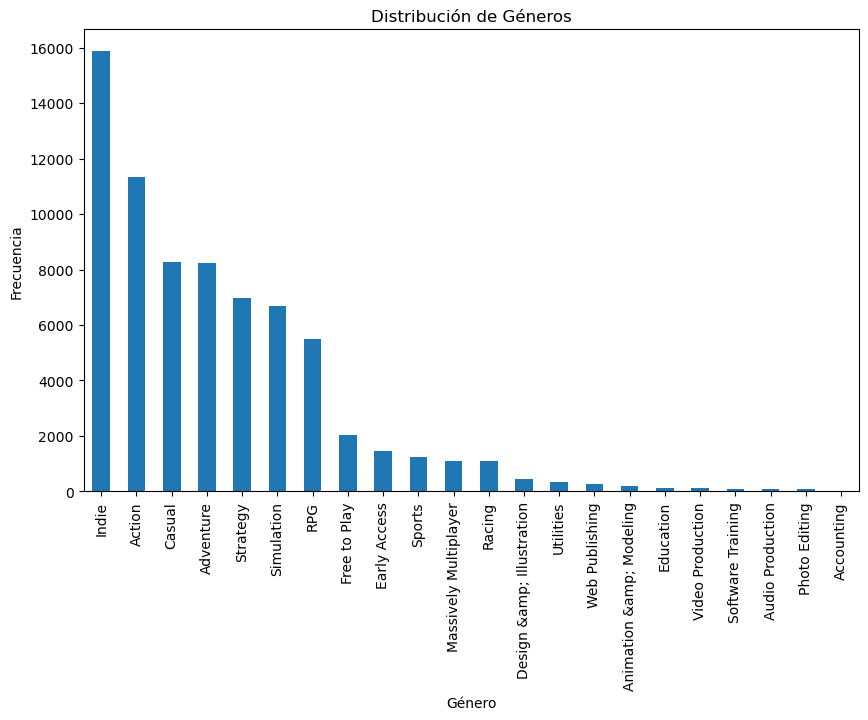

In [6]:
#Distribución de géneros
import matplotlib.pyplot as plt
# Convierte la lista de géneros en columnas individuales
df_genres = df['genres'].explode()

# Calcula la frecuencia de cada género
genre_counts = df_genres.value_counts()

# Visualiza la distribución de géneros con un gráfico de barras
genre_counts.plot(kind='bar', figsize=(10, 6), title='Distribución de Géneros')
plt.xlabel('Género')
plt.ylabel('Frecuencia')
plt.show()

Ahora veremos las tendencias de lanzamientos a lo largo de los años

C:\Users\naomi\AppData\Local\Temp\ipykernel_1272\3522326851.py:5: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')


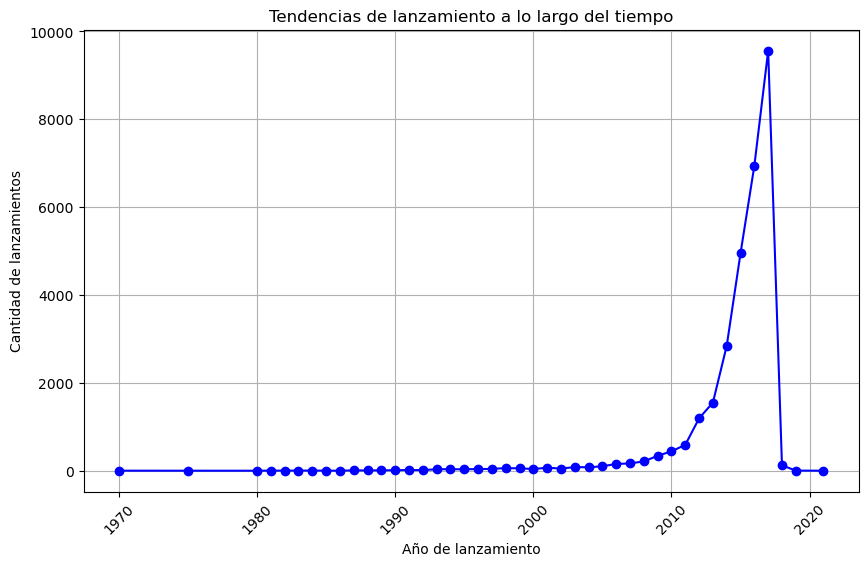

In [26]:
# Elimina los registros con valores no válidos en la columna "release_date"
df = df.dropna(subset=['release_date'])

# Convierte la columna "release_date" a formato de fecha, ignorando los valores "Soon.."
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')

# Elimina los registros con fechas no válidas (por ejemplo, "Soon..")
df = df.dropna(subset=['release_date'])

# Extrae el año de lanzamiento de cada registro
df['year'] = df['release_date'].dt.year

# Cuenta la cantidad de lanzamientos por año
release_counts_by_year = df['year'].value_counts().sort_index()

# Visualiza los datos en un gráfico de líneas
plt.figure(figsize=(10, 6))
plt.plot(release_counts_by_year.index, release_counts_by_year.values, marker='o', linestyle='-', color='b')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Cantidad de lanzamientos')
plt.title('Tendencias de lanzamiento a lo largo del tiempo')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


Análisis de etiquetas y especificaciones

## Etiquetas más comunes

In [37]:
# Filtrar las filas que no tienen valores faltantes en la columna 'tags'
df_filtered = df.dropna(subset=['tags'])

# Concatenar todas las listas de etiquetas en un solo conjunto
tags_set = set()
for tags_list in df_filtered['tags']:
    tags_set.update(tags_list)

# Calcular la frecuencia de cada etiqueta
tag_counts = {tag: sum(tag in tags_list for tags_list in df_filtered['tags']) for tag in tags_set}

# Crear un DataFrame para mostrar los resultados
tags_df = pd.DataFrame(list(tag_counts.items()), columns=['Tag', 'Frecuencia'])

# Ordenar el DataFrame por frecuencia descendente
tags_df = tags_df.sort_values(by='Frecuencia', ascending=False)

# Mostrar las etiquetas más comunes
print(tags_df.head(10))

                  Tag  Frecuencia
147             Indie       14748
226            Action       10736
234         Adventure        8233
180            Casual        8185
323          Strategy        6670
132        Simulation        6579
195               RPG        5048
250      Singleplayer        3863
133  Great Soundtrack        2044
137            Puzzle        1905


In [38]:
# Filtrar las filas que no tienen valores faltantes en la columna 'specs'
df_filtered = df.dropna(subset=['specs'])

# Concatenar todas las listas de especificaciones en un solo conjunto
specs_set = set()
for specs_list in df_filtered['specs']:
    specs_set.update(specs_list)

# Calcular la frecuencia de cada especificación
specs_counts = {spec: sum(spec in specs_list for specs_list in df_filtered['specs']) for spec in specs_set}

# Crear un DataFrame para mostrar los resultados
specs_df = pd.DataFrame(list(specs_counts.items()), columns=['Especificación', 'Frecuencia'])

# Ordenar el DataFrame por frecuencia descendente
specs_df = specs_df.sort_values(by='Frecuencia', ascending=False)

# Mostrar las especificaciones más comunes
print(specs_df.head(10))

                Especificación  Frecuencia
22               Single-player       23537
15          Steam Achievements       14543
2         Downloadable Content       11712
25         Steam Trading Cards       11146
26                 Steam Cloud        9149
12                Multi-player        7192
7      Full controller support        6544
27  Partial Controller Support        5869
10          Steam Leaderboards        5495
6                        Co-op        3833
